In [ ]:
from scipy.io import loadmat
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

KSC

CNN

In [ ]:
ksx = loadmat('/content/drive/MyDrive/HSI/KSC.mat')['KSC']
ksy = loadmat('/content/drive/MyDrive/HSI/KSC_gt.mat')['KSC_gt']
ksx.shape,ksy.shape

((512, 614, 176), (512, 614))

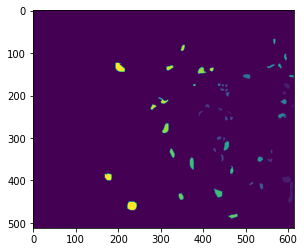

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ksy)
plt.savefig('KSC ground truth')

In [ ]:
uniques, ids = np.unique(ksy, return_inverse=True)
len(uniques)

14

In [ ]:
ksx = ksx.reshape(512*614,176,1)
ksy = ksy.reshape(512*614)
ksx.shape, ksy.shape

((314368, 176, 1), (314368,))

In [ ]:
from keras.utils import np_utils
ksy = np_utils.to_categorical(ids, len(uniques))
ksx.shape, ksy.shape

((314368, 176, 1), (314368, 14))

In [ ]:
from keras.layers import Input, Dense, Reshape, Flatten, Embedding, merge, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling1D, Conv1D, MaxPooling1D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from keras.layers import Conv2DTranspose
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers import Activation
from keras.utils.vis_utils import plot_model

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(176,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(87,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(42,32)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(14, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 174, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 87, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 85, 32)            1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ksx.reshape(-1,176,1), ksy, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((251494, 176, 1), (251494, 14), (62874, 176, 1), (62874, 14))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
50299/50299 [==============================] - 249s 5ms/step - loss: 0.7301 - accuracy: 0.9826 - val_loss: 0.1299 - val_accuracy: 0.9838
Epoch 2/5
50299/50299 [==============================] - 241s 5ms/step - loss: 0.2246 - accuracy: 0.9830 - val_loss: 0.4477 - val_accuracy: 0.9839
Epoch 3/5
50299/50299 [==============================] - 246s 5ms/step - loss: 0.2363 - accuracy: 0.9833 - val_loss: 0.1221 - val_accuracy: 0.9839
Epoch 4/5
50299/50299 [==============================] - 253s 5ms/step - loss: 0.3240 - accuracy: 0.9832 - val_loss: 0.5904 - val_accuracy: 0.9839
Epoch 5/5
50299/50299 [==============================] - 254s 5ms/step - loss: 0.3592 - accuracy: 0.9834 - val_loss: 0.1217 - val_accuracy: 0.9839


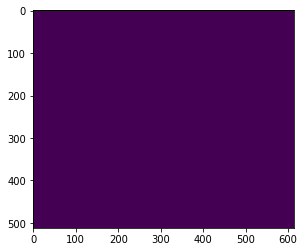

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p = model.predict(ksx)
y_p = uniques[y_p.argmax(1)]
y_p = y_p.reshape(512,614)
from matplotlib import pyplot as plt
plt.imshow(y_p, interpolation='nearest')
plt.show()
plt.savefig('KS')

PCA - CNN

In [ ]:
ksx = ksx.reshape(-1,176)
ksx.shape, ksy.shape

((314368, 176), (314368, 14))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(ksx)
reduced_ksx = pca.transform(ksx)
reduced_ksx = reduced_ksx.reshape(-1,50,1) 

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(50,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(24,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(14, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 48, 16)            64        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 16)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 22, 32)            1568      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 11, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 352)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                4942      
Total params: 6,574
Trainable params: 6,574
Non-trainable params: 0
____________________________________________________

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_ksx, ksy, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((220057, 50, 1), (220057, 14), (94311, 50, 1), (94311, 14))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
6877/6877 [==============================] - 26s 4ms/step - loss: 3.2549 - accuracy: 0.9706 - val_loss: 0.2086 - val_accuracy: 0.9835
Epoch 2/5
6877/6877 [==============================] - 25s 4ms/step - loss: 0.2803 - accuracy: 0.9831 - val_loss: 0.1696 - val_accuracy: 0.9835
Epoch 3/5
6877/6877 [==============================] - 24s 4ms/step - loss: 0.2242 - accuracy: 0.9825 - val_loss: 0.1451 - val_accuracy: 0.9837
Epoch 4/5
6877/6877 [==============================] - 25s 4ms/step - loss: 0.1859 - accuracy: 0.9831 - val_loss: 0.1965 - val_accuracy: 0.9825
Epoch 5/5
6877/6877 [==============================] - 25s 4ms/step - loss: 0.1487 - accuracy: 0.9834 - val_loss: 0.1368 - val_accuracy: 0.9835


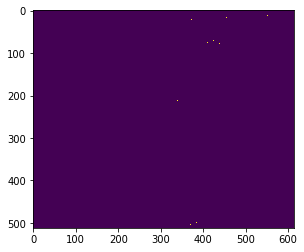

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p_pca = model.predict(reduced_ksx)
y_p_pca = uniques[y_p_pca.argmax(1)]
y_p_pca = y_p_pca.reshape(512,614)
from matplotlib import pyplot as plt
plt.imshow(y_p_pca, interpolation='nearest')
plt.show()
plt.savefig('KS with PCA')

Salinas

CNN

In [ ]:
sx = loadmat('/content/drive/MyDrive/HSI/Salinas.mat')['salinas']
sy = loadmat('/content/drive/MyDrive/HSI/Salinas_gt.mat')['salinas_gt']
sx.shape,sy.shape

NameError: ignored

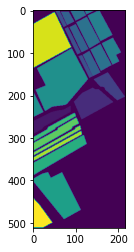

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(sy)
plt.savefig('Salinas ground truth')

In [ ]:
sx = sx.reshape(512*217,224,1)
sy = sy.reshape(512*217)
sx.shape, sy.shape

((111104, 224, 1), (111104,))

In [ ]:
uniques, ids = np.unique(sy, return_inverse=True)
from keras.utils import np_utils
sy = np_utils.to_categorical(ids, len(uniques))
sx.shape, sy.shape

((111104, 224, 1), (111104, 17))

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(224,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(111,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(54,32)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(17, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 222, 16)           64        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 111, 16)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 109, 32)           1568      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 54, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 52, 64)            6208      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 26, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1664)             

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sx.reshape(-1,224,1), sy, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((88883, 224, 1), (88883, 17), (22221, 224, 1), (22221, 17))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
17777/17777 [==============================] - 95s 5ms/step - loss: 3.0639 - accuracy: 0.5974 - val_loss: 0.9185 - val_accuracy: 0.6875
Epoch 2/5
17777/17777 [==============================] - 94s 5ms/step - loss: 0.8659 - accuracy: 0.6952 - val_loss: 0.7176 - val_accuracy: 0.6940
Epoch 3/5
17777/17777 [==============================] - 95s 5ms/step - loss: 0.6326 - accuracy: 0.7427 - val_loss: 0.4825 - val_accuracy: 0.8005
Epoch 4/5
17777/17777 [==============================] - 95s 5ms/step - loss: 0.5286 - accuracy: 0.7866 - val_loss: 0.5192 - val_accuracy: 0.7866
Epoch 5/5
17777/17777 [==============================] - 95s 5ms/step - loss: 0.4842 - accuracy: 0.8050 - val_loss: 0.4821 - val_accuracy: 0.7870


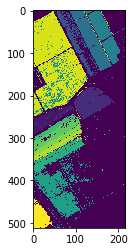

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p = model.predict(sx)
y_p = uniques[y_p.argmax(1)]
y_p = y_p.reshape(512,217)
from matplotlib import pyplot as plt
plt.imshow(y_p, interpolation='nearest')
plt.show()
plt.savefig('Salinas')

PCA - CNN

In [ ]:
sx = sx.reshape(-1,224)
sx.shape, sy.shape

((111104, 224), (111104, 17))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(sx)
reduced_sx = pca.transform(sx)
reduced_sx = reduced_sx.reshape(-1,50,1)

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(50,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(24,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(17, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 48, 16)            64        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 24, 16)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 22, 32)            1568      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 11, 32)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 352)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 17)                6001      
Total params: 7,633
Trainable params: 7,633
Non-trainable params: 0
____________________________________________________

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_sx, sy, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((77772, 50, 1), (77772, 17), (33332, 50, 1), (33332, 17))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
15555/15555 [==============================] - 31s 2ms/step - loss: 4.2543 - accuracy: 0.7761 - val_loss: 0.3648 - val_accuracy: 0.8819
Epoch 2/5
15555/15555 [==============================] - 30s 2ms/step - loss: 0.3821 - accuracy: 0.8659 - val_loss: 0.3589 - val_accuracy: 0.8832
Epoch 3/5
15555/15555 [==============================] - 31s 2ms/step - loss: 0.3399 - accuracy: 0.8776 - val_loss: 0.3386 - val_accuracy: 0.8834
Epoch 4/5
15555/15555 [==============================] - 33s 2ms/step - loss: 0.3311 - accuracy: 0.8819 - val_loss: 0.3716 - val_accuracy: 0.8763
Epoch 5/5
15555/15555 [==============================] - 32s 2ms/step - loss: 0.3053 - accuracy: 0.8894 - val_loss: 0.3671 - val_accuracy: 0.8825


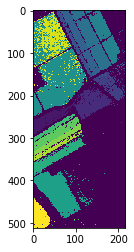

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p_pca = model.predict(reduced_sx)
y_p_pca = uniques[y_p_pca.argmax(1)]
y_p_pca = y_p_pca.reshape(512,217)
from matplotlib import pyplot as plt
plt.imshow(y_p_pca, interpolation='nearest')
plt.show()
plt.savefig('Salinass with PCA')

Botswana

CNN

In [ ]:
bx = loadmat('/content/drive/MyDrive/HSI/Botswana.mat')['Botswana']
by = loadmat('/content/drive/MyDrive/HSI/Botswana_gt.mat')['Botswana_gt']
bx.shape,by.shape

((1476, 256, 145), (1476, 256))

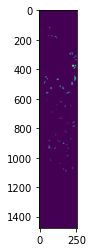

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(by)
plt.savefig('Botswana ground truth')

In [ ]:
bx = bx.reshape(1476*256,145,1)
by = by.reshape(1476*256)
bx.shape, by.shape

((377856, 145, 1), (377856,))

In [ ]:
uniques, ids = np.unique(by, return_inverse=True)
by = np_utils.to_categorical(ids, len(uniques))
bx.shape, by.shape

((377856, 145, 1), (377856, 15))

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(145,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(71,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(34,32)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 143, 16)           64        
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 71, 16)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 69, 32)            1568      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 34, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 32, 64)            6208      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 16, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bx.reshape(-1,145,1), by, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((302284, 145, 1), (302284, 15), (75572, 145, 1), (75572, 15))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
60457/60457 [==============================] - 256s 4ms/step - loss: 0.3033 - accuracy: 0.9906 - val_loss: 0.0719 - val_accuracy: 0.9915
Epoch 2/5
60457/60457 [==============================] - 260s 4ms/step - loss: 0.0729 - accuracy: 0.9914 - val_loss: 0.0716 - val_accuracy: 0.9915
Epoch 3/5
60457/60457 [==============================] - 265s 4ms/step - loss: 0.0726 - accuracy: 0.9914 - val_loss: 0.0717 - val_accuracy: 0.9915
Epoch 4/5
60457/60457 [==============================] - 279s 5ms/step - loss: 0.0733 - accuracy: 0.9913 - val_loss: 0.0714 - val_accuracy: 0.9915
Epoch 5/5
60457/60457 [==============================] - 270s 4ms/step - loss: 0.0711 - accuracy: 0.9916 - val_loss: 0.0715 - val_accuracy: 0.9915


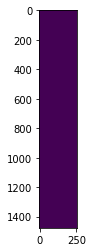

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p = model.predict(bx)
y_p = uniques[y_p.argmax(1)]
y_p = y_p.reshape(1476,256)
from matplotlib import pyplot as plt
plt.imshow(y_p, interpolation='nearest')
plt.show()
plt.savefig('Botswana')

PCA - CNN

In [ ]:
bx = bx.reshape(-1,145)
bx.shape, by.shape

((377856, 145), (377856, 15))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(bx)
reduced_bx = pca.transform(bx)
reduced_bx = reduced_bx.reshape(-1,50,1)

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(50,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(24,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 48, 16)            64        
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 24, 16)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 22, 32)            1568      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 11, 32)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 352)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                5295      
Total params: 6,927
Trainable params: 6,927
Non-trainable params: 0
____________________________________________________

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_bx, by, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((264499, 50, 1), (264499, 15), (113357, 50, 1), (113357, 15))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
52900/52900 [==============================] - 109s 2ms/step - loss: 0.4436 - accuracy: 0.9874 - val_loss: 0.0832 - val_accuracy: 0.9913
Epoch 2/5
52900/52900 [==============================] - 102s 2ms/step - loss: 0.0959 - accuracy: 0.9913 - val_loss: 0.0720 - val_accuracy: 0.9913
Epoch 3/5
52900/52900 [==============================] - 101s 2ms/step - loss: 0.1109 - accuracy: 0.9915 - val_loss: 0.1361 - val_accuracy: 0.9913
Epoch 4/5
52900/52900 [==============================] - 103s 2ms/step - loss: 0.1055 - accuracy: 0.9918 - val_loss: 0.0724 - val_accuracy: 0.9913
Epoch 5/5
52900/52900 [==============================] - 105s 2ms/step - loss: 0.1333 - accuracy: 0.9913 - val_loss: 0.0723 - val_accuracy: 0.9913


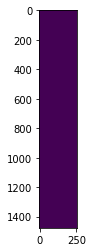

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p_pca = model.predict(reduced_bx)
y_p_pca = uniques[y_p_pca.argmax(1)]
y_p_pca = y_p_pca.reshape(1476,256)
from matplotlib import pyplot as plt
plt.imshow(y_p_pca, interpolation='nearest')
plt.show()
plt.savefig('Botswana with PCA')

**INDIAN PINES**



CNN

In [ ]:
ipx = loadmat('/content/drive/MyDrive/HSI/Indian_pines.mat')['indian_pines']
ipy = loadmat('/content/drive/MyDrive/HSI/Indian_pines_gt.mat')['indian_pines_gt']
ipx.shape,ipy.shape

((145, 145, 220), (145, 145))

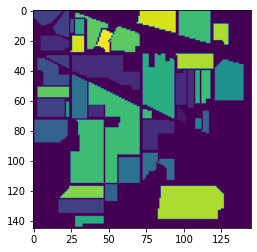

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ipy)
plt.savefig('Indian Pines ground truth')

In [ ]:
ipx = ipx.reshape(145*145,220,1)
ipy = ipy.reshape(145*145)
ipx.shape, ipy.shape

((21025, 220, 1), (21025,))

In [ ]:
uniques, ids = np.unique(ipy, return_inverse=True)
ipy = np_utils.to_categorical(ids, len(uniques))
ipx.shape, ipy.shape

((21025, 220, 1), (21025, 17))

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(220,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(109,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(53,32)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(17, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 218, 16)           64        
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 109, 16)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 107, 32)           1568      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 51, 64)            6208      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 25, 64)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)             

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ipx.reshape(-1,220,1), ipy, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16820, 220, 1), (16820, 17), (4205, 220, 1), (4205, 17))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
3364/3364 [==============================] - 19s 5ms/step - loss: 16.0430 - accuracy: 0.4624 - val_loss: 1.5733 - val_accuracy: 0.5054
Epoch 2/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.4904 - accuracy: 0.5376 - val_loss: 2.1318 - val_accuracy: 0.5056
Epoch 3/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.9476 - accuracy: 0.5113 - val_loss: 1.8672 - val_accuracy: 0.5056
Epoch 4/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.8165 - accuracy: 0.5184 - val_loss: 1.8523 - val_accuracy: 0.5056
Epoch 5/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.8479 - accuracy: 0.5068 - val_loss: 1.8510 - val_accuracy: 0.5056


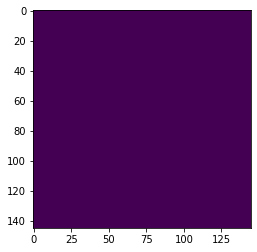

<Figure size 432x288 with 0 Axes>

In [ ]:
y_ip = model.predict(ipx)
y_ip = uniques[y_ip.argmax(1)]
y_ip = y_ip.reshape(145,145)
from matplotlib import pyplot as plt
plt.imshow(y_ip, interpolation='nearest')
plt.show()
plt.savefig('Indian Pines')

CNN - PCA

In [ ]:
ipx = ipx.reshape(-1,220)
ipx.shape, ipy.shape

((21025, 220), (21025, 17))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(ipx)
reduced_ipx = pca.transform(ipx)
reduced_ipx = reduced_bx.reshape(-1,50,1)

Pavia





CNN

In [ ]:
px = loadmat('/content/drive/MyDrive/HSI/Pavia.mat')['pavia']
py = loadmat('/content/drive/MyDrive/HSI/Pavia_gt.mat')['pavia_gt']
px.shape,py.shape

((1096, 715, 102), (1096, 715))

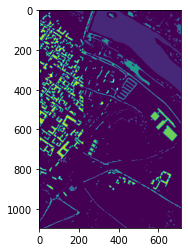

In [ ]:
plt.imshow(py)
plt.savefig('Pavia ground truth')

In [ ]:
px = px.reshape(1096*715,102,1)
py = py.reshape(1096*715)
px.shape,py.shape

((783640, 102, 1), (783640,))

In [ ]:
uniques, ids = np.unique(py, return_inverse=True)
len(uniques)
py = np_utils.to_categorical(ids, len(uniques))
py.shape

(783640, 10)

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(102,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(50,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 100, 16)           64        
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 50, 16)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 48, 32)            1568      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 24, 32)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               76900     
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(px, py, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548548, 102, 1), (548548, 10), (235092, 102, 1), (235092, 10))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
17143/17143 [==============================] - 109s 6ms/step - loss: 2.7549 - accuracy: 0.8560 - val_loss: 0.3123 - val_accuracy: 0.8789
Epoch 2/5
17143/17143 [==============================] - 108s 6ms/step - loss: 0.3050 - accuracy: 0.8829 - val_loss: 0.3094 - val_accuracy: 0.8809
Epoch 3/5
17143/17143 [==============================] - 106s 6ms/step - loss: 0.2873 - accuracy: 0.8860 - val_loss: 0.2804 - val_accuracy: 0.8872
Epoch 4/5
17143/17143 [==============================] - 107s 6ms/step - loss: 0.2812 - accuracy: 0.8874 - val_loss: 0.2738 - val_accuracy: 0.8888
Epoch 5/5
17143/17143 [==============================] - 109s 6ms/step - loss: 0.2794 - accuracy: 0.8884 - val_loss: 0.2743 - val_accuracy: 0.8889


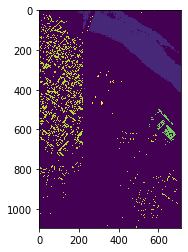

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p = model.predict(px)
y_p = uniques[y_p.argmax(1)]
y_p = y_p.reshape(1096,715)
from matplotlib import pyplot as plt
plt.imshow(y_p, interpolation='nearest')
plt.show()
plt.savefig('Pavia')

CNN - PCA

In [ ]:
px = px.reshape(-1,102)
px.shape,py.shape

((783640, 102), (783640, 10))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(px)
reduced_px = pca.transform(px)
reduced_px = reduced_px.reshape(-1,50,1) 

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(50,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(24,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 48, 16)            64        
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 24, 16)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 22, 32)            1568      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 11, 32)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 352)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                3530      
Total params: 5,162
Trainable params: 5,162
Non-trainable params: 0
___________________________________________________

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_px, py, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548548, 50, 1), (548548, 10), (235092, 50, 1), (235092, 10))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
17143/17143 [==============================] - 64s 4ms/step - loss: 1.8186 - accuracy: 0.8434 - val_loss: 0.3097 - val_accuracy: 0.8795
Epoch 2/5
17143/17143 [==============================] - 63s 4ms/step - loss: 0.3149 - accuracy: 0.8774 - val_loss: 0.2979 - val_accuracy: 0.8825
Epoch 3/5
17143/17143 [==============================] - 63s 4ms/step - loss: 0.3070 - accuracy: 0.8789 - val_loss: 0.3102 - val_accuracy: 0.8797
Epoch 4/5
17143/17143 [==============================] - 63s 4ms/step - loss: 0.3045 - accuracy: 0.8792 - val_loss: 0.2958 - val_accuracy: 0.8814
Epoch 5/5
17143/17143 [==============================] - 63s 4ms/step - loss: 0.3008 - accuracy: 0.8809 - val_loss: 0.3109 - val_accuracy: 0.8773


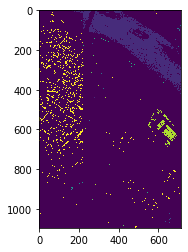

<Figure size 432x288 with 0 Axes>

In [ ]:
y_p_pca = model.predict(reduced_px)
y_p_pca = uniques[y_p_pca.argmax(1)]
y_p_pca = y_p_pca.reshape(1096,715)
from matplotlib import pyplot as plt
plt.imshow(y_p_pca, interpolation='nearest')
plt.show()
plt.savefig('Pavia with PCA')

GAN

In [ ]:
def gan(g_model, d_model):
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# connect the outputs of the generator to the inputs of the discriminator
	gan_output = d_model(g_model.output)
	# define gan model as taking noise and label and outputting real/fake and label outputs
	model = Model(g_model.input, gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
	return model

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=17):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ipx.reshape(-1,200,1), ipy, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16820, 200, 1), (16820, 17), (4205, 200, 1), (4205, 17))

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=64):
	# calculate the number of batches per training epoch
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# calculate the size of half a batch of samples
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
  print("asdadsasdas")
	for i in range(n_steps):
  #  print('asxccvvvvvvvvvvvv')
		# get randomly selected 'real' samples
		[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
		# update discriminator model weights
		_,d_r1,d_r2 = d_model.train_on_batch(X_real, [y_real, labels_real])
		# generate 'fake' examples
		[X_fake, labels_fake], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator model weights
		_,d_f,d_f2 = d_model.train_on_batch(X_fake, [y_fake, labels_fake])
		# prepare points in latent space as input for the generator
		[z_input, z_labels] = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		_,g_1,g_2 = gan_model.train_on_batch([z_input, z_labels], [y_gan, z_labels])
		# summarize loss on this batch
    # print('trainidn started')
		print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_r1,d_r2, d_f,d_f2, g_1,g_2))
		# evaluate the model performance every 'epoch'
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, latent_dim)
  #  if i%1000 == 0:
  #    keras.ModelCheckpoint(________________________)

In [ ]:
train(___,_____,____,____,____,____,____)

In [ ]:
# plt.plot(range(run),err_dis,label='Discriminator')
# plt.plot(range(run),err_gen,label='Generator')
# plt.legend()
# plt.title('Training Losses')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')

In [ ]:
# torch.save(netD,'Discriminator network 1')
# torch.save(netG,'Generator network 1')

In [ ]:
d_model

In [ ]:
classifier = torch.load('Discriminator network') #use this line to save model in variable 'a'

In [ ]:
classifier(img).max()

CNN

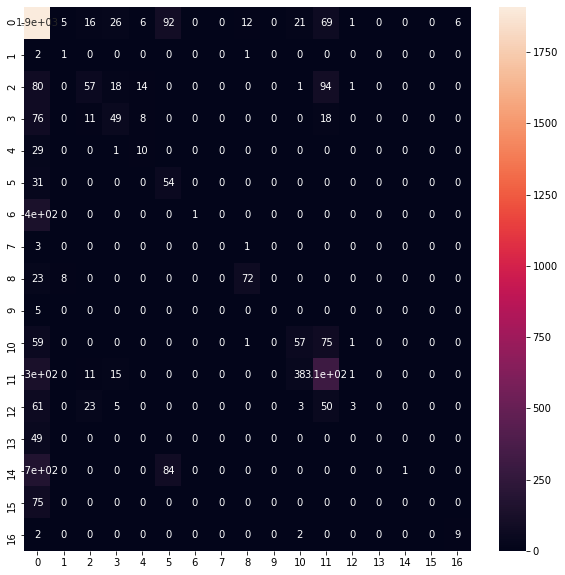

In [ ]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(cm, range(17), range(17))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)